In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the dataset
df = pd.read_csv(r"C:\Users\Er_luciferR.LUC\Downloads\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## 3. Data Checks to perform

- Check Missing Values

- Check Duplicates
- Check data types
- Check the number of unique values of each columns 
- Check Statistics of the dataset
- Check various categories present u=in the different colunms

In [6]:
#Check Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Insights or Observation
- There are no missing values

In [9]:
#Check Duplicates
df.duplicated().sum()

0

## Insights or Observation
- There are no missing values

In [10]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Insights or Observation
- dtypes: int64(3), object(5)

In [14]:
#Check the number of unique values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
#Check Statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights or Observation
- From above description , mean is very close to each other between 66 - 69
- All std are close between 14.6 to 15.19
- Maths score have minimum value of 0 while other have 10 & 17

In [21]:
# segregate Numerical and Categorical features
numerical_feature = {cols for cols in df.columns if df[cols].dtype != 'O'}
categorical_feature = {cols for cols in df.columns if df[cols].dtype == 'O'}

In [25]:
{i for i in df.columns if df[i].dtype != 'O'}

{'math_score', 'reading_score', 'writing_score'}

In [27]:
#Aggregate the total score with mean
df['total_score'] = df['math_score'] + df['reading_score'] + df['reading_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.000000
1,female,group C,some college,standard,completed,69,90,88,249,83.000000
2,female,group B,master's degree,standard,none,90,95,93,280,93.333333
3,male,group A,associate's degree,free/reduced,none,47,57,44,161,53.666667
4,male,group C,some college,standard,none,76,78,75,232,77.333333


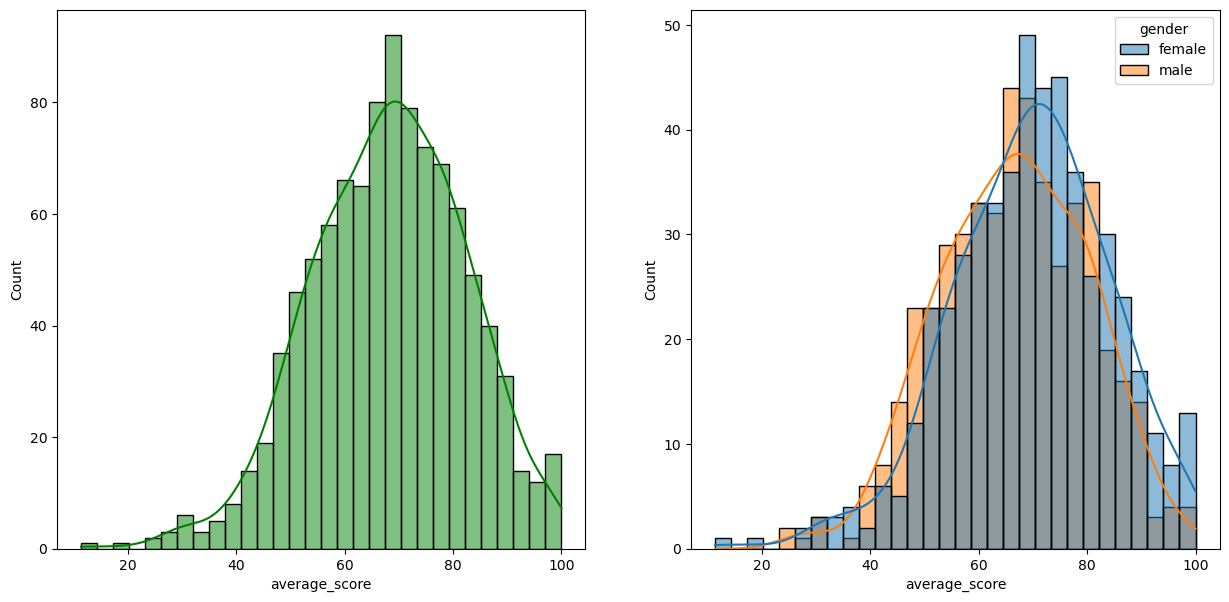

In [30]:
# Explore more visualization
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data= df , x = 'average_score' , bins=30 , kde=True , color= 'g')
plt.subplot(122)
sns.histplot(data= df , x = 'average_score' , bins=30 , kde=True , hue='gender')
plt.show()

## Insights
- Females tends to perform well than Male

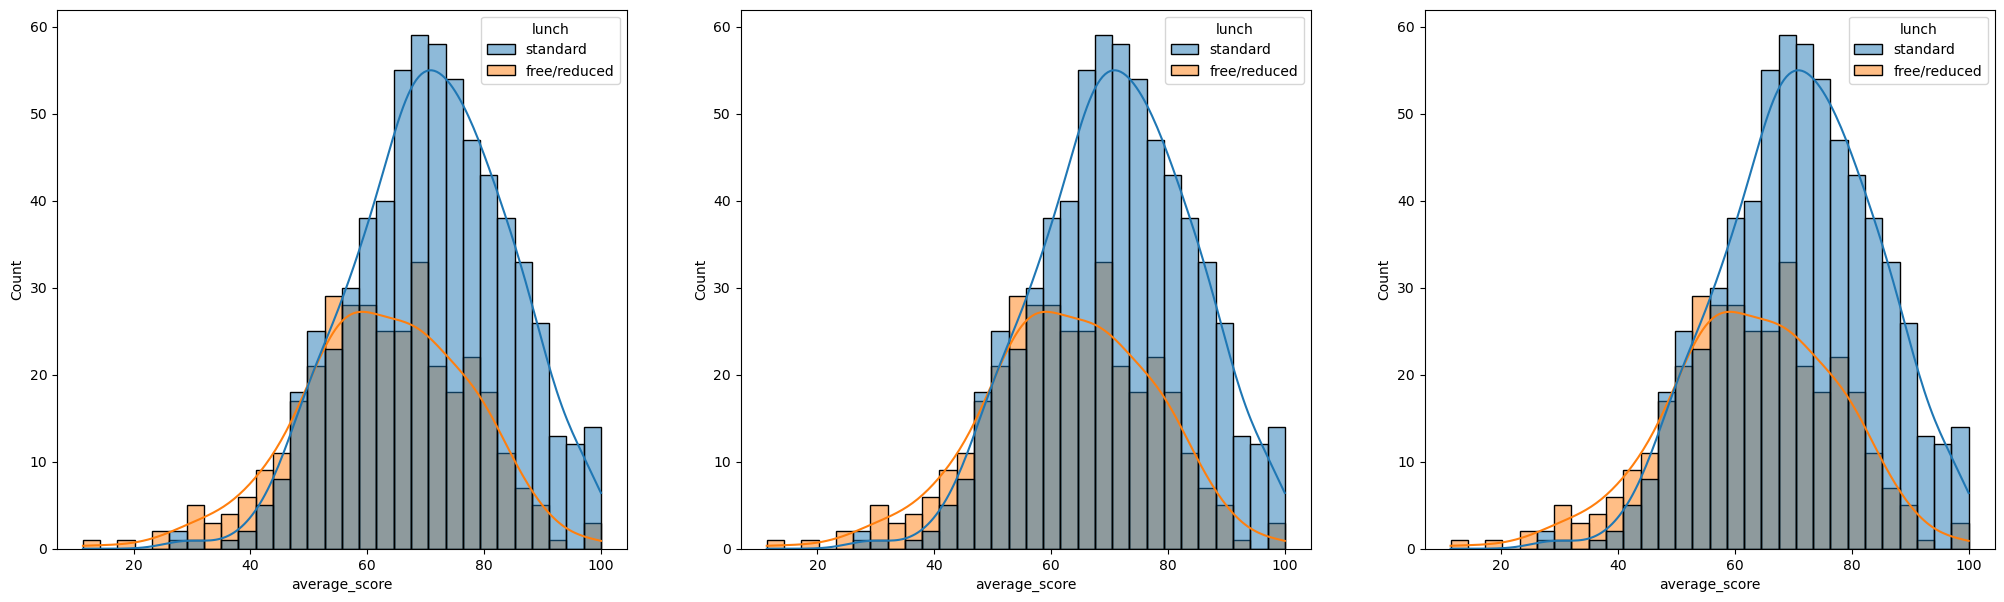

In [32]:
fig,axis = plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data= df , x = 'average_score' , bins=30 , kde=True , hue='lunch')
plt.subplot(132)
sns.histplot(data= df , x = 'average_score' , bins=30 , kde=True , hue='lunch')
plt.subplot(133)
sns.histplot(data= df , x = 'average_score' , bins=30 , kde=True , hue='lunch')
plt.show()

# Insights
- Standard lunch helps to perform well in exam (male and female both)

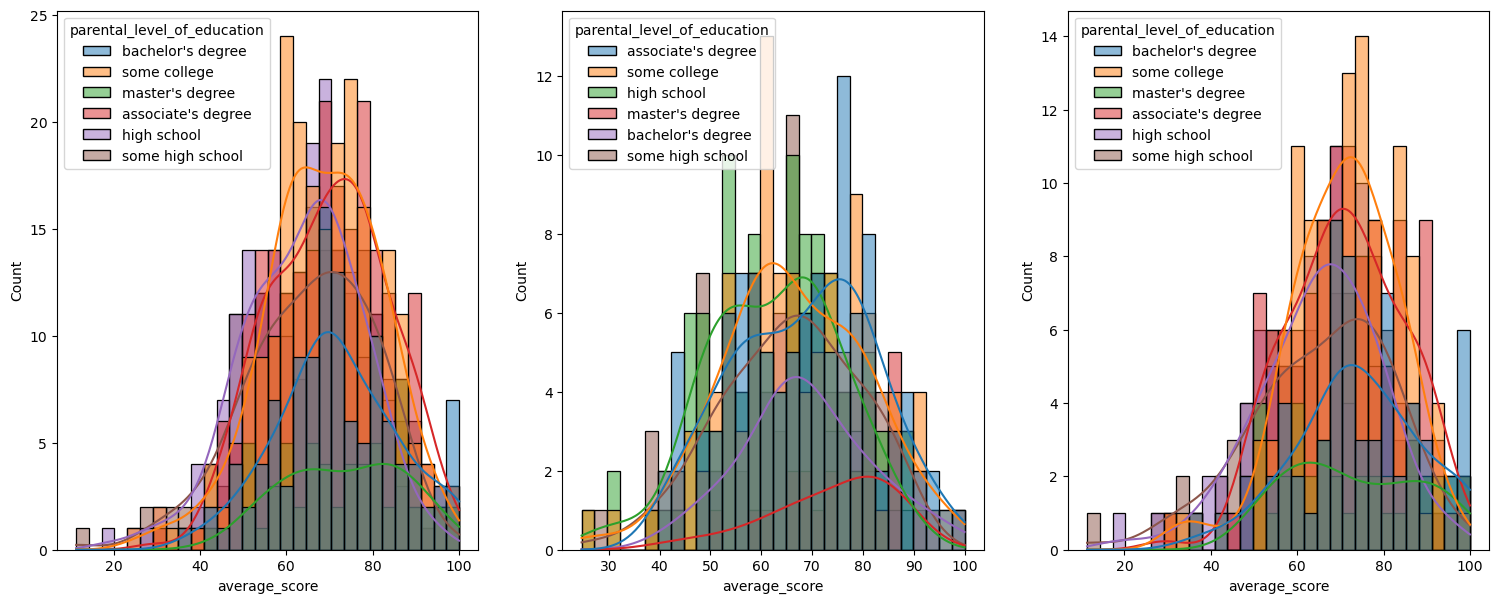

In [37]:
fig,axis = plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data= df , x = 'average_score' , bins=30 , kde=True , hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data= df[df.gender == 'male'] , x = 'average_score', bins=30 , kde=True , hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'female'] , x = 'average_score' , bins=30 , kde=True , hue='parental_level_of_education')
plt.show()

## Insights
- In general parent's education don't help to perform well in exam
- 2nd plot, Parents who's education is of associate or masters degree thier male child tends to perform well
- 3rd plot, No effect of parental education

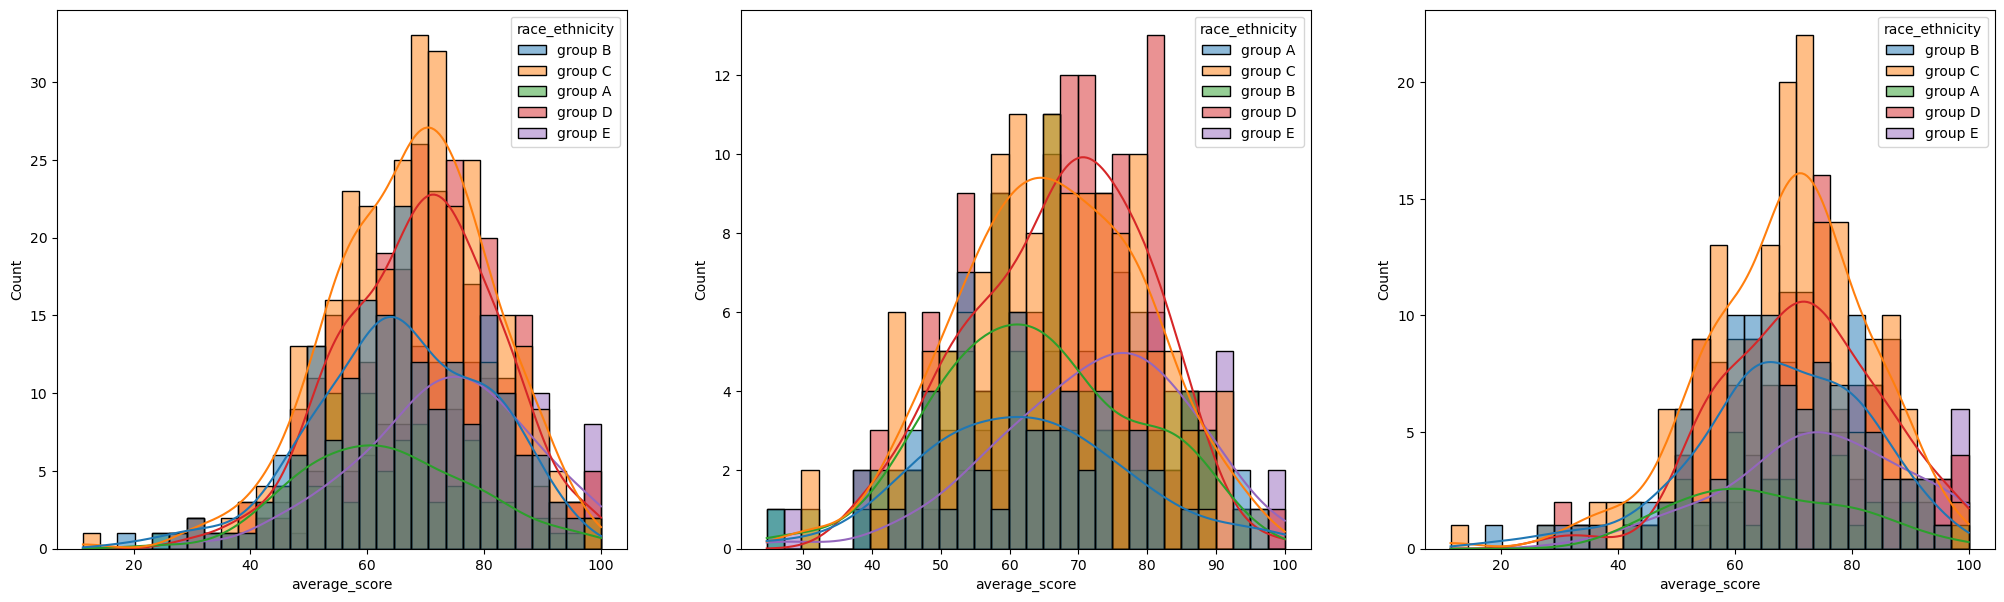

In [39]:
fig,axis = plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data= df , x = 'average_score' , bins=30 , kde=True , hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data= df[df.gender == 'male'] , x = 'average_score', bins=30 , kde=True , hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data= df[df.gender == 'female'] , x = 'average_score' , bins=30 , kde=True , hue='race_ethnicity')
plt.show()

## Insights
- Group A and Group B tends to perform poor regardless of gender

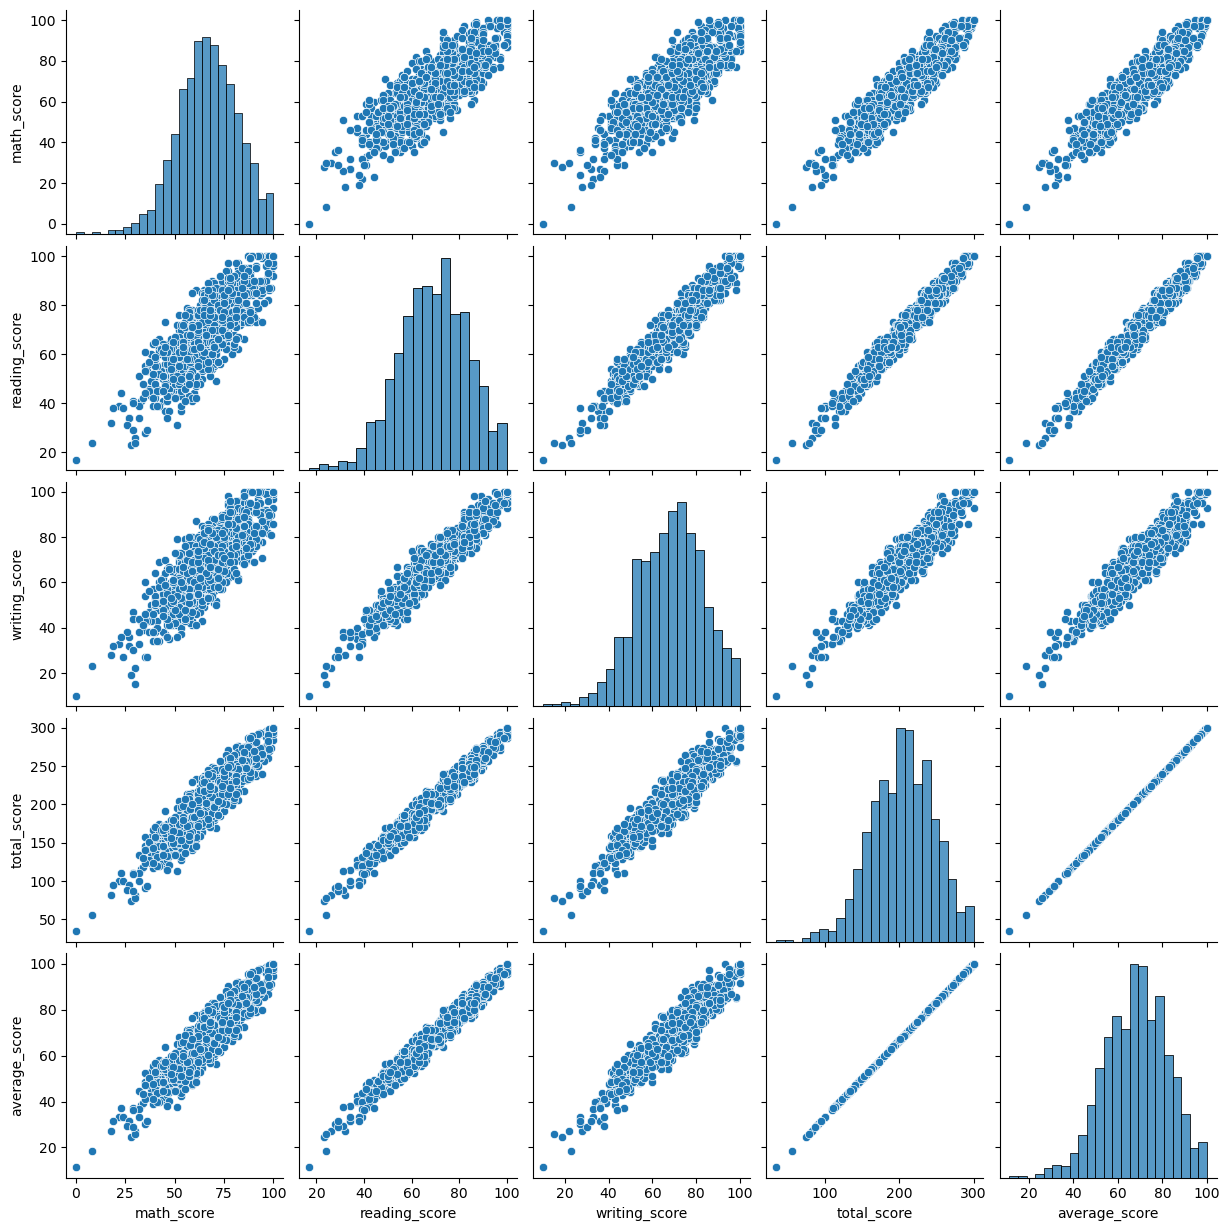

In [40]:
sns.pairplot(df)

<AxesSubplot:>

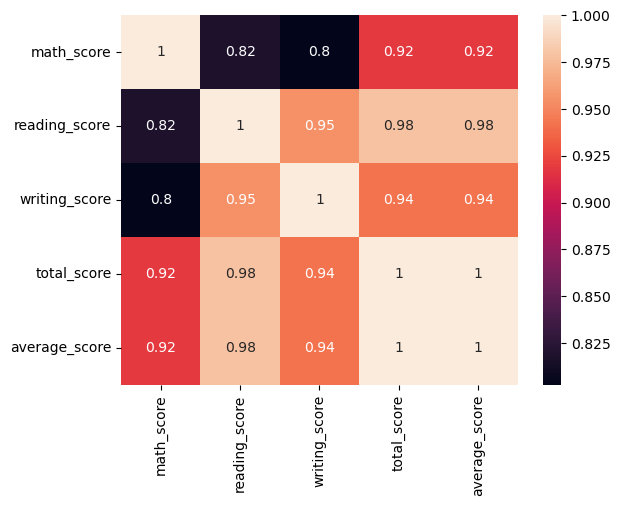

In [42]:
sns.heatmap(df.corr(), annot=True)